<a href="https://colab.research.google.com/github/Mansibaher/Mansibaher/blob/main/Mendeley_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.makedirs("/content/data", exist_ok=True)


In [ ]:
!unzip Hydrophone.zip -d /content/data/Hydrophone
!unzip Accelerometer.zip -d /content/data/Accelerometer
!unzip DynamicPressureSensor.zip -d /content/data/DynamicPressureSensor


Archive:  Hydrophone.zip
   creating: /content/data/Hydrophone/Hydrophone/
   creating: /content/data/Hydrophone/Hydrophone/Background Noise/
  inflating: /content/data/Hydrophone/Hydrophone/Background Noise/Background Noise_H1.raw  
  inflating: /content/data/Hydrophone/Hydrophone/Background Noise/Background Noise_H2.raw  
   creating: /content/data/Hydrophone/Hydrophone/Branched/
   creating: /content/data/Hydrophone/Hydrophone/Branched/Circumferential Crack/
  inflating: /content/data/Hydrophone/Hydrophone/Branched/Circumferential Crack/BR_CC_0.18 LPS_N_H1.raw  
  inflating: /content/data/Hydrophone/Hydrophone/Branched/Circumferential Crack/BR_CC_0.18 LPS_N_H2.raw  
  inflating: /content/data/Hydrophone/Hydrophone/Branched/Circumferential Crack/BR_CC_0.47 LPS_N_H1.raw  
  inflating: /content/data/Hydrophone/Hydrophone/Branched/Circumferential Crack/BR_CC_0.47 LPS_N_H2.raw  
  inflating: /content/data/Hydrophone/Hydrophone/Branched/Circumferential Crack/BR_CC_ND_NN_H1.raw  
  inflati

In [ ]:
!ls /content


 Accelerometer.zip  'Dynamic Pressure Sensor.zip'   sample_data
 data		     Hydrophone.zip


In [ ]:
!unzip /content/Hydrophone.zip -d /content/data/Hydrophone
!unzip /content/Accelerometer.zip -d /content/data/Accelerometer
!unzip /content/DynamicPressureSensor.zip -d /content/data/DynamicPressureSensor


Archive:  /content/Hydrophone.zip
replace /content/data/Hydrophone/Hydrophone/Background Noise/Background Noise_H1.raw? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/data/Hydrophone/Hydrophone/Background Noise/Background Noise_H1.raw  
  inflating: /content/data/Hydrophone/Hydrophone/Background Noise/Background Noise_H2.raw  
  inflating: /content/data/Hydrophone/Hydrophone/Branched/Circumferential Crack/BR_CC_0.18 LPS_N_H1.raw  
  inflating: /content/data/Hydrophone/Hydrophone/Branched/Circumferential Crack/BR_CC_0.18 LPS_N_H2.raw  
  inflating: /content/data/Hydrophone/Hydrophone/Branched/Circumferential Crack/BR_CC_0.47 LPS_N_H1.raw  
  inflating: /content/data/Hydrophone/Hydrophone/Branched/Circumferential Crack/BR_CC_0.47 LPS_N_H2.raw  
  inflating: /content/data/Hydrophone/Hydrophone/Branched/Circumferential Crack/BR_CC_ND_NN_H1.raw  
  inflating: /content/data/Hydrophone/Hydrophone/Branched/Circumferential Crack/BR_CC_ND_NN_H2.raw  
  inflating: /content/data/Hyd

In [ ]:
!find /content/data -maxdepth 3 -type d -print


/content/data
/content/data/Hydrophone
/content/data/Hydrophone/Hydrophone
/content/data/Hydrophone/Hydrophone/Branched
/content/data/Hydrophone/Hydrophone/Looped
/content/data/Hydrophone/Hydrophone/Background Noise
/content/data/Accelerometer
/content/data/Accelerometer/Accelerometer
/content/data/Accelerometer/Accelerometer/Branched
/content/data/Accelerometer/Accelerometer/Looped


HYDROPHONES

Hydrophone files → no-leak: 26   leak: 96


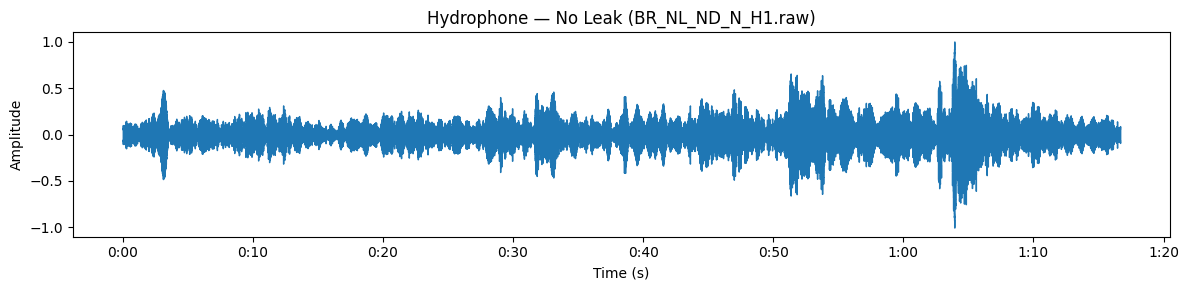

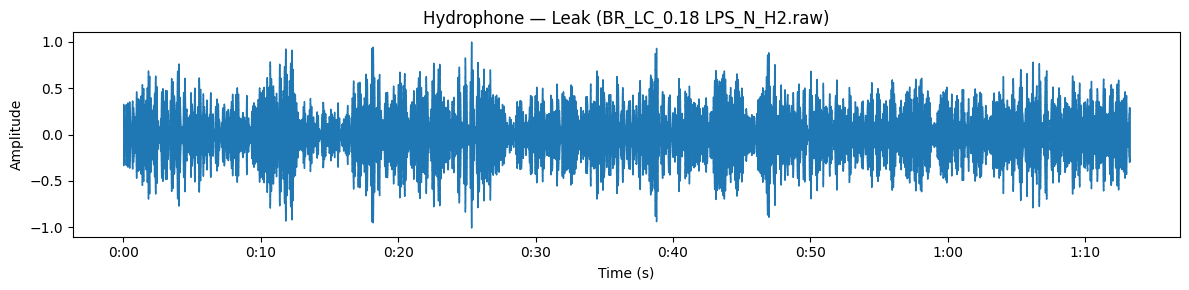

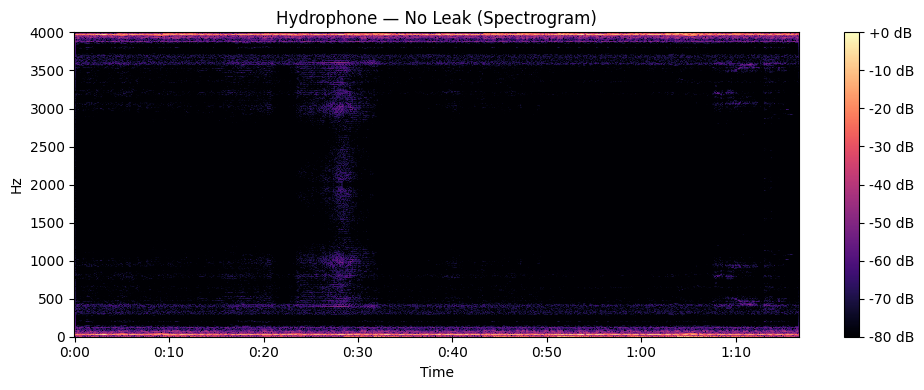

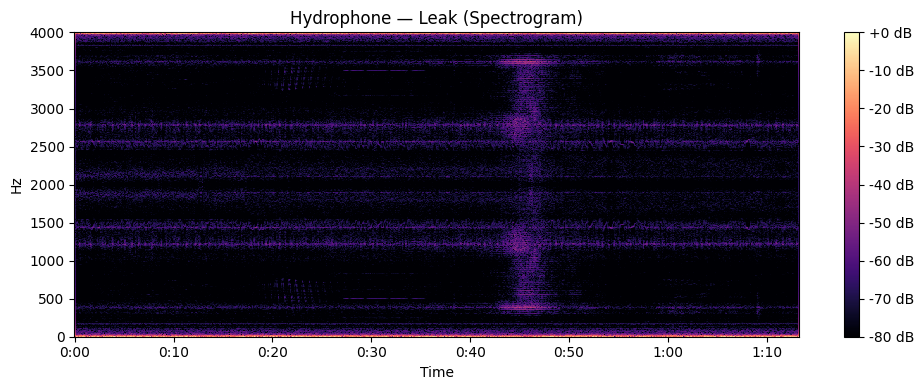

In [ ]:
import os, glob, numpy as np, librosa, librosa.display, matplotlib.pyplot as plt

HYDRO_ROOT = "/content/data/Hydrophone/Hydrophone"   # note the double 'Hydrophone'
HYDRO_SR = 8000  # dataset raw sampling rate (int16)

# Find audio-like files (handles both .raw and .wav just in case)
hydro_files = []
for ext in ("*.raw","*.RAW","*.wav","*.WAV"):
    hydro_files += glob.glob(os.path.join(HYDRO_ROOT, "**", ext), recursive=True)

def is_noleak(p:str)->bool:
    q = p.lower()
    return ("background" in q) or ("no-leak" in q) or ("no leak" in q)

hydro_nl = [p for p in hydro_files if is_noleak(p)]
hydro_lk = [p for p in hydro_files if not is_noleak(p)]
print("Hydrophone files → no-leak:", len(hydro_nl), "  leak:", len(hydro_lk))

# Load helper: RAW (int16) or WAV
def load_audio_auto(path, sr_raw=HYDRO_SR):
    if path.lower().endswith(".raw"):
        x = np.fromfile(path, dtype=np.int16).astype(np.float32)
        if x.size>0: x /= max(1.0, np.max(np.abs(x)))  # normalize to [-1,1]
        return x, sr_raw
    y, sr = librosa.load(path, sr=None, mono=True)
    return y.astype(np.float32), sr

# Pick one of each
nl_path = hydro_nl[0]
lk_path = hydro_lk[0]
y_nl, sr_nl = load_audio_auto(nl_path)
y_lk, sr_lk = load_audio_auto(lk_path)

def plot_wave(y, sr, title):
    plt.figure(figsize=(12,3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title); plt.xlabel("Time (s)"); plt.ylabel("Amplitude")
    plt.tight_layout(); plt.show()

def plot_spec(y, sr, title):
    D = np.abs(librosa.stft(y))
    S = librosa.amplitude_to_db(D, ref=np.max)
    plt.figure(figsize=(10,4))
    librosa.display.specshow(S, sr=sr, x_axis="time", y_axis="hz", cmap="magma")
    plt.colorbar(format="%+2.0f dB")
    plt.title(title); plt.tight_layout(); plt.show()

plot_wave(y_nl, sr_nl, f"Hydrophone — No Leak ({os.path.basename(nl_path)})")
plot_wave(y_lk, sr_lk, f"Hydrophone — Leak ({os.path.basename(lk_path)})")
plot_spec(y_nl, sr_nl, "Hydrophone — No Leak (Spectrogram)")
plot_spec(y_lk, sr_lk, "Hydrophone — Leak (Spectrogram)")


The leak signal usually shows stronger, irregular amplitude and broader energy bands in the spectrogram; background/no-leak is steadier and lower-energy.

DATA DISTRIBUTION PLOTS (RMS & ZCR)


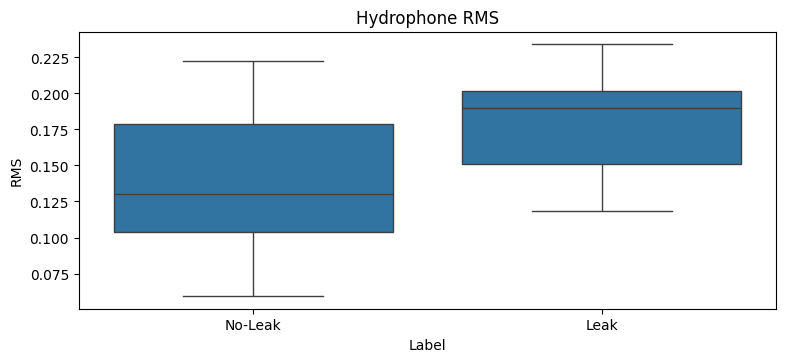

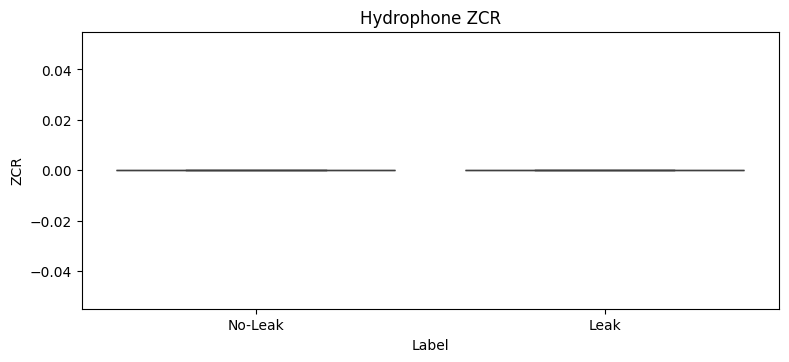

In [ ]:
import pandas as pd, seaborn as sns

def rms(x): return float(np.sqrt(np.mean(x**2)))
def zcr(x): return float(((x[:-1]*x[1:]) < 0).mean())

rows = []
for p in hydro_nl[:40]:
    x,_ = load_audio_auto(p); rows.append({"Sensor":"Hydrophone","RMS":rms(x),"ZCR":zcr(x),"Label":"No-Leak"})
for p in hydro_lk[:40]:
    x,_ = load_audio_auto(p); rows.append({"Sensor":"Hydrophone","RMS":rms(x),"ZCR":zcr(x),"Label":"Leak"})

df_h = pd.DataFrame(rows)
plt.figure(figsize=(9,3.6)); sns.boxplot(data=df_h, x="Label", y="RMS"); plt.title("Hydrophone RMS"); plt.show()
plt.figure(figsize=(9,3.6)); sns.boxplot(data=df_h, x="Label", y="ZCR"); plt.title("Hydrophone ZCR"); plt.show()


MFCCs + Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def mfcc_mean(x, sr, n=13):
    if np.max(np.abs(x))>0: x =32 . x/np.max(np.abs(x))
    M = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=n)
    return M.mean(axis=1)

feat_rows = []
for p in hydro_nl[:25]:
    x,sr = load_audio_auto(p)
    feat_rows.append({"Label":0, "RMS":rms(x), "ZCR":zcr(x), **{f"MFCC{i}":v for i,v in enumerate(mfcc_mean(x,sr))}})
for p in hydro_lk[:25]:
    x,sr = load_audio_auto(p)
    feat_rows.append({"Label":1, "RMS":rms(x), "ZCR":zcr(x), **{f"MFCC{i}":v for i,v in enumerate(mfcc_mean(x,sr))}})

df_feat = pd.DataFrame(feat_rows)
X = df_feat.drop(columns=["Label"]).values
y = df_feat["Label"].values
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_tr,y_tr)
pred = rf.predict(X_te)
print("Hydrophone RF accuracy:", accuracy_score(y_te, pred))


Hydrophone RF accuracy: 0.8


ACCELEROMETER


80 csv, 0 txt, 0 raw, 0 wav
     Sample     Value
0  0.000000  0.001774
1  0.000039  0.001735
2  0.000078  0.002081
3  0.000117  0.002336
4  0.000156  0.002757


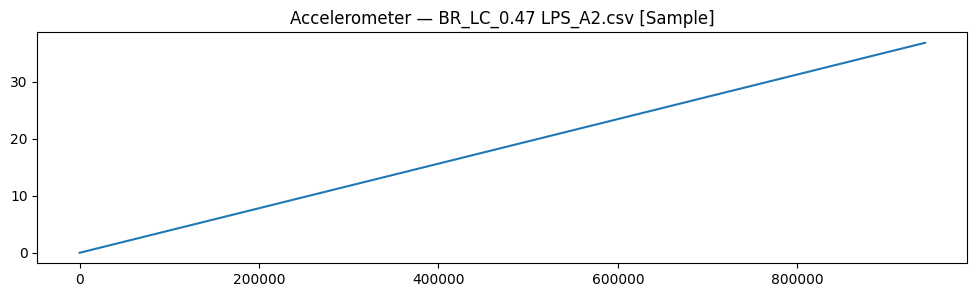

In [ ]:
import pandas as pd, numpy as np, glob, os, matplotlib.pyplot as plt, librosa

ACCEL_ROOT = "/content/data/Accelerometer/Accelerometer"

# grab candidates
accel_csv = glob.glob(os.path.join(ACCEL_ROOT, "**", "*.csv"), recursive=True)
accel_txt = glob.glob(os.path.join(ACCEL_ROOT, "**", "*.txt"), recursive=True)
accel_raw = glob.glob(os.path.join(ACCEL_ROOT, "**", "*.raw"), recursive=True)
accel_wav = glob.glob(os.path.join(ACCEL_ROOT, "**", "*.wav"), recursive=True) + \
            glob.glob(os.path.join(ACCEL_ROOT, "**", "*.WAV"), recursive=True)

print(len(accel_csv), "csv,", len(accel_txt), "txt,", len(accel_raw), "raw,", len(accel_wav), "wav")

if accel_wav:
    p = accel_wav[0]
    y, sr = librosa.load(p, sr=None, mono=True)
    plt.figure(figsize=(12,3)); librosa.display.waveshow(y, sr=sr)
    plt.title(f"Accelerometer WAV — {os.path.basename(p)}"); plt.show()
elif accel_raw:
    p = accel_raw[0]
    x = np.fromfile(p, dtype=np.int16).astype(np.float32)
    if x.size>0: x/=np.max(np.abs(x))
    plt.figure(figsize=(12,3)); plt.plot(x); plt.title(f"Accelerometer RAW — {os.path.basename(p)}")
    plt.xlabel("Samples"); plt.ylabel("Amplitude"); plt.show()
elif accel_csv or accel_txt:
    p = (accel_csv or accel_txt)[0]
    try: df = pd.read_csv(p)
    except: df = pd.read_csv(p, sep="\t", engine="python")
    print(df.head())
    # try to plot first numeric column
    num_cols = [c for c in df.columns if np.issubdtype(df[c].dtype, np.number)]
    if num_cols:
        plt.figure(figsize=(12,3)); plt.plot(df[num_cols[0]].values)
        plt.title(f"Accelerometer — {os.path.basename(p)} [{num_cols[0]}]"); plt.show()
else:
    print("No accelerometer files found; check folder or formats.")


loading and extracting the features

In [ ]:
import os, numpy as np, librosa, pandas as pd
from sklearn.model_selection import train_test_split

HYDRO_ROOT = "/content/data/Hydrophone/Hydrophone"

def is_noleak(p):
    q = p.lower()
    return ("background" in q) or ("no leak" in q) or ("no-leak" in q)

def load_audio(path):
    if path.lower().endswith(".raw"):
        x = np.fromfile(path, dtype=np.int16).astype(np.float32)
        x /= np.max(np.abs(x))
        return x, 8000
    else:
        y, sr = librosa.load(path, sr=None, mono=True)
        return y, sr

def extract_features(x, sr):
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13).mean(axis=1)
    rms = np.sqrt(np.mean(x**2))
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=x))
    return np.concatenate(([rms, zcr], mfccs))

# Gather file paths
import glob
all_files = glob.glob(os.path.join(HYDRO_ROOT, "**", "*.*"), recursive=True)
noleak_files = [f for f in all_files if is_noleak(f)]
leak_files = [f for f in all_files if not is_noleak(f)]

# Extract features
rows = []
for p in noleak_files[:50]:
    x, sr = load_audio(p); rows.append(np.append(extract_features(x, sr), 0))
for p in leak_files[:50]:
    x, sr = load_audio(p); rows.append(np.append(extract_features(x, sr), 1))

cols = ["RMS", "ZCR"] + [f"MFCC{i}" for i in range(1,14)] + ["Label"]
df = pd.DataFrame(rows, columns=cols)
df.head()


,RMS,ZCR,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,Label
0,0.097084,0.491474,-464.931610,43.888344,64.509621,4.981309,42.030983,7.849509,35.596684,1.834837,28.434164,15.541740,36.853226,21.439920,34.038986,0.0
1,0.186377,0.499667,-468.310577,31.543274,52.657265,10.312875,46.647247,0.617472,11.831898,3.351873,29.286146,2.536251,20.220913,6.978841,38.220379,0.0
2,0.216389,0.499065,-487.772766,35.637398,56.738297,17.656687,43.926235,13.584708,36.106407,7.978693,32.667023,14.589883,37.034233,17.547586,35.175522,0.0
3,0.123629,0.492324,-470.588348,26.656223,44.872475,21.660349,38.736961,15.896141,33.015228,11.932795,29.792250,10.663368,28.758461,10.655175,27.639330,0.0
4,0.088418,0.500854,-516.923767,12.590230,25.514997,9.067470,23.074308,5.821829,16.761702,4.296354,18.462618,5.291798,17.664289,6.341840,20.715937,0.0


In [ ]:
X = df.drop(columns=["Label"])
y = df["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', C=1, gamma='scale'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "MLP Neural Net": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, acc, f1))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
results_df.sort_values(by="Accuracy", ascending=False)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,F1 Score
4,MLP Neural Net,0.869565,0.896552
0,Random Forest,0.826087,0.875000
3,Logistic Regression,0.826087,0.882353
2,KNN,0.695652,0.810811
1,SVM (RBF),0.652174,0.789474


/tmp/ipython-input-1571782588.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Accuracy", y="Model", palette="Blues_r")


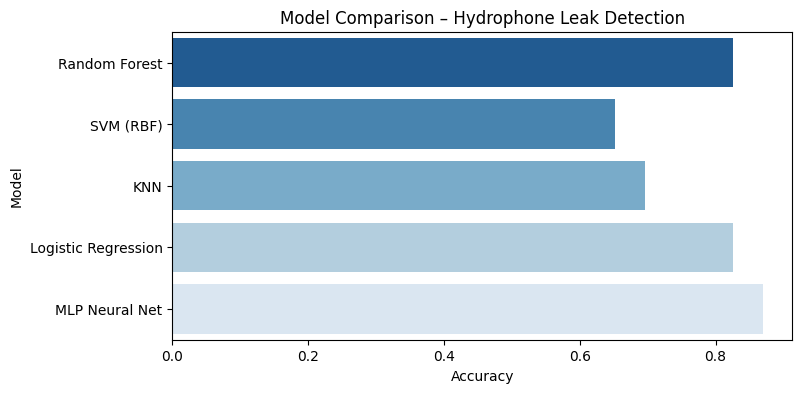

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x="Accuracy", y="Model", palette="Blues_r")
plt.title("Model Comparison – Hydrophone Leak Detection")
plt.xlabel("Accuracy")
plt.show()


Accelerometer

In [ ]:
import os, glob, numpy as np, pandas as pd, librosa, librosa.display, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

def is_noleak(p):
    q = p.lower()
    return ("background" in q) or ("no leak" in q) or ("no-leak" in q)

def feats_from_signal(x, sr, n_mfcc=13):
    x = np.asarray(x, np.float32)
    if len(x)==0: return None
    if np.max(np.abs(x))>0: x /= np.max(np.abs(x))
    rms = float(np.sqrt(np.mean(x**2)))
    zcr = float(np.mean(librosa.feature.zero_crossing_rate(x)))
    mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=n_mfcc).mean(axis=1)
    return np.concatenate(([rms, zcr], mfcc))

def rank_models(X, y, title=""):
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
        "SVM (RBF)"    : SVC(kernel="rbf", C=1.5, gamma="scale"),
        "KNN"          : KNeighborsClassifier(n_neighbors=5),
        "Logistic Reg.": LogisticRegression(max_iter=1000),
        "MLP (64,32)"  : MLPClassifier(hidden_layer_sizes=(64,32), max_iter=700, random_state=42),
    }
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    rows=[]
    for name, m in models.items():
        m.fit(Xtr, ytr)
        yp = m.predict(Xte)
        rows.append([name, accuracy_score(yte, yp), f1_score(yte, yp)])
    import pandas as pd, seaborn as sns
    df = pd.DataFrame(rows, columns=["Model","Accuracy","F1"])
    display(df.sort_values("Accuracy", ascending=False).style.hide_index())
    plt.figure(figsize=(8,4)); sns.barplot(data=df, x="Accuracy", y="Model"); plt.title(title); plt.xlim(0,1); plt.show()
    return df.sort_values("Accuracy", ascending=False)


In [ ]:
ACCEL_ROOT = "/content/data/Accelerometer/Accelerometer"

acc_files = []
for ext in ("*.csv","*.CSV","*.txt","*.TXT","*.wav","*.WAV","*.raw","*.RAW"):
    acc_files += glob.glob(os.path.join(ACCEL_ROOT, "**", ext), recursive=True)

acc_nl = [p for p in acc_files if is_noleak(p)]
acc_lk = [p for p in acc_files if not is_noleak(p)]
print("Accelerometer:", len(acc_nl), "no-leak,", len(acc_lk), "leak")


Accelerometer: 0 no-leak, 0 leak


In [ ]:
def read_table_any(path):
    try:    return pd.read_csv(path)
    except: return pd.read_csv(path, sep=None, engine="python")

def infer_time_axes(df):
    t_col=None
    for c in df.columns:
        cl=c.lower()
        if ("time" in cl) or (cl in ["t","timestamp","ts","sec","seconds","ms","millis"]):
            t_col=c; break
    num_cols=[c for c in df.columns if np.issubdtype(df[c].dtype, np.number)]
    axes=[]
    for key in ["x","y","z","ax","ay","az","acc","accx","accy","accz"]:
        for c in num_cols:
            if key==c.lower() or key in c.lower(): axes.append(c)
    if not axes: axes=num_cols[:3]
    axes=list(dict.fromkeys(axes))
    return t_col, axes

def make_1d_from_df(df, t_col, axes, target_sr=4000):
    arr=[df[a].values.astype(np.float32) for a in axes if a in df]
    if len(arr)==0: return None, None
    sig = arr[0] if len(arr)==1 else np.sqrt(np.sum([a**2 for a in arr], axis=0))
    # infer sr
    if t_col and t_col in df:
        t = df[t_col].values.astype(float)
        dt = np.median(np.diff(t[np.isfinite(t)]))
        sr = 1000.0/dt if dt>10 else 1.0/dt  # ms vs s
    else:
        sr = 1000.0
    sig_rs = librosa.resample(sig.astype(np.float64), orig_sr=sr, target_sr=target_sr).astype(np.float32)
    return sig_rs, target_sr

def load_accel(path):
    if path.lower().endswith((".csv",".txt",".tsv")):
        df = read_table_any(path)
        t_col, axes = infer_time_axes(df)
        return make_1d_from_df(df, t_col, axes, target_sr=4000)
    elif path.lower().endswith(".raw"):
        x = np.fromfile(path, dtype=np.int16).astype(np.float32);
        if x.size>0: x/=np.max(np.abs(x))
        return x, 4000
    else:  # wav
        y,sr=librosa.load(path, sr=None, mono=True); return y.astype(np.float32), sr

# pick files
a_nl, a_lk = acc_nl[0], acc_lk[0]
x_nl, sr_nl = load_accel(a_nl)
x_lk, sr_lk = load_accel(a_lk)

# plots
plt.figure(figsize=(12,3)); plt.plot(x_nl); plt.title("Accelerometer — No Leak (resampled)"); plt.xlabel("Samples"); plt.show()
plt.figure(figsize=(12,3)); plt.plot(x_lk); plt.title("Accelerometer — Leak (resampled)"); plt.xlabel("Samples"); plt.show()

def plot_spec(x, sr, title):
    S = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
    plt.figure(figsize=(10,4)); librosa.display.specshow(S, sr=sr, x_axis="time", y_axis="hz", cmap="magma")
    plt.colorbar(format="%+2.0f dB"); plt.title(title); plt.tight_layout(); plt.show()

plot_spec(x_nl, sr_nl, "Accelerometer — No Leak (Spectrogram)")
plot_spec(x_lk, sr_lk, "Accelerometer — Leak (Spectrogram)")


IndexError: list index out of range

In [ ]:
!ls /content/data/Accelerometer


ls: cannot access '/content/data/Accelerometer': No such file or directory


In [ ]:
!mkdir -p /content/data/Accelerometer
!mkdir -p /content/data/DynamicPressureSensor
!ls /content/data


Accelerometer  DynamicPressureSensor


In [ ]:
!ls /content


data  sample_data


In [ ]:
!unzip -o /content/Accelerometer.zip -d /content/data/Accelerometer
!unzip -o /content/DynamicPressureSensor.zip -d /content/data/DynamicPressureSensor


unzip:  cannot find or open /content/Accelerometer.zip, /content/Accelerometer.zip.zip or /content/Accelerometer.zip.ZIP.
unzip:  cannot find or open /content/DynamicPressureSensor.zip, /content/DynamicPressureSensor.zip.zip or /content/DynamicPressureSensor.zip.ZIP.


In [ ]:
from google.colab import files
uploaded = files.upload()
